In [1163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [1164]:
df = pd.read_csv('rawdata.csv')

In [1165]:
df.head()

,Team,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Team.1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Rk,Date,Tm,NaN,Opp,Result,MP,FG,FGA,FG%,...,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,PTS
1,1,2018-10-16,BOS,NaN,PHI,W 105-87,240,42,97,0.433,...,29,61,0.475,5,26,0.192,14,23,0.609,87
2,2,2018-10-16,PHI,@,BOS,L 87-105,240,34,87,0.391,...,31,60,0.517,11,37,0.297,10,14,0.714,105
3,3,2018-10-16,GSW,NaN,OKC,W 108-100,240,42,95,0.442,...,23,54,0.426,10,37,0.27,24,37,0.649,100
4,4,2018-10-16,OKC,@,GSW,L 100-108,240,33,91,0.363,...,35,69,0.507,7,26,0.269,17,18,0.944,108


In [1166]:
#Rename Columns & Droplist
columnz = ['Rank','Date','Home_Team','@','Away_Team','Result','Minutes_Played','Field_Goal','Field_Goal_Attempts','Field_Goal_%','2Point','2Point_Attempts','2Point_%','3Point','3Point_Attempts','3Point_%','Free_Throw','Free_Throw_Attempt','Free_Throw_%','Points','Away_Field_Goal','Away_Field_Goal_Attempts','Away_Field_Goal_%','Away_2Point','Away_2Point_Attempts','Away_2Point_%','Away_3Point','Away_3Point_Attempts','Away_3Point_%','Away_Free_Throw','Away_Free_Throw_Attempt','Away_Free_Throw_%','Away_Points']
df.columns = columnz
droplist = ['Minutes_Played','Result','@']

In [1167]:
#removed nulls and noises
df = df.iloc[: , 1:]
df = df.drop(0)
df = df.drop(df[df['@'] == '@'].index)
df = df.drop(droplist, axis =1)
df = df.dropna()

In [1400]:
df = df.reset_index(drop=True)

In [1348]:
df = df.astype({'Free_Throw':'int','Points':'int','Free_Throw_%':'float','Away_Free_Throw_%':'float','Away_Free_Throw':'int','3Point_%':'float','2Point_%':'float','Away_Free_Throw_%':'float','Away_3Point_%':'float','Away_2Point_%':'float','Field_Goal_Attempts':'int','Away_Points':'int','Away_Field_Goal_Attempts':'int'})

In [1169]:
#homestat & away stat for data cleaning
homestatlist = ['Field_Goal','Field_Goal_Attempts','Field_Goal_%','2Point','2Point_Attempts','2Point_%','3Point','3Point_Attempts','3Point_%','Free_Throw','Free_Throw_Attempt','Free_Throw_%','Points']
awaystatlist = ['Away_Field_Goal','Away_Field_Goal_Attempts','Away_Field_Goal_%','Away_2Point','Away_2Point_Attempts','Away_2Point_%','Away_3Point','Away_3Point_Attempts','Away_3Point_%','Away_Free_Throw','Away_Free_Throw_Attempt','Away_Free_Throw_%','Away_Points']

In [1454]:
df.head()

,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,3Point,...,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency,ielo,away_ielo,Away_ielo
0,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,11,...,0.192,14,23,0.609,87,108.247423,100.000000,1500,1500,1500
1,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,7,...,0.270,24,37,0.649,100,113.684211,109.890110,1500,1500,1500
2,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,16,...,0.412,15,20,0.750,113,121.739130,132.941176,1500,1500,1500
3,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,6,...,0.185,15,22,0.682,100,111.956522,121.951220,1500,1500,1500
4,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,16,...,0.400,17,22,0.773,131,121.739130,133.673469,1500,1500,1500


In [1452]:
#Function to return team stat
def byTeam(string):
    x = df.loc[df['Home_Team']==string]
    x = x.drop(awaystatlist,axis=1)
    y = df.loc[df['Away_Team']==string]
    y = y.drop(homestatlist,axis=1)
    return pd.concat([x,y])

In [1458]:
#Importance of HomeCourt FreeThrow Percentage in HomeCourt - Home Court Advantage
def ftpercent(x):
    y = round(x['Free_Throw_%']*100,2).dropna().mean()
    return y

In [1456]:
#AwayCounterpart
def awayftpercent(x):
    y = round(x['Away_Free_Throw_%']*100,2).dropna().mean()
    return y

In [1459]:
def threeptpercent(x):
    y = round(x['3Point_%']*100,2).dropna().mean()
    return y

In [1460]:
def awaythreeptpercent(x):
    y = round(x['Away_3Point_%']*100,2).dropna().mean()
    return y

In [1461]:
def twoptpercent(x):
    y = round(x['2Point_%']*100,2).dropna().mean()
    return y

In [1463]:
def awaytwoptpercent(x):
    y = round(x['Away_2Point_%']*100,2).dropna().mean()
    return y

In [1462]:
def offeff(x):
    y = round(x['Offensive_Efficiency'],2).dropna().mean()
    return y

In [1183]:
newdf = pd.DataFrame()
newdf['Team'] = df['Home_Team']
newdf = newdf.drop_duplicates().reset_index(drop=True)

In [1466]:
####ASK MENTOR, find some way to append
nbadata = []
for x in newdf['Team']:
    nbadata.append(ftpercent(byTeam(x)))
newdf['Free_Throw_%'] = nbadata


In [1467]:
away_ft = []
for x in newdf['Team']:
    away_ft.append(awayftpercent(byTeam(x)))
newdf['Away_Free_Throw_%'] = away_ft

In [1468]:
threept = []
for x in newdf['Team']:
    threept.append(threeptpercent(byTeam(x)))
newdf['3Point_%'] = threept

In [1469]:
off_eff = []
for x in newdf['Team']:
    off_eff.append(offeff(byTeam(x)))
newdf['Offensive_Efficiency'] = offeff

In [1481]:
newdf.head(10)

,Team,FT_%,3pt_%,2pt_%,Free_Throw_%,Away_Free_Throw_%,3Point_%,Away_3Point_%,2Point_%,Away_2Point_%
0,BOS,79.632743,36.788496,52.755310,80.665487,78.600000,37.348673,36.228319,53.853097,51.657522
1,GSW,79.570621,36.541191,53.529329,80.015315,79.125926,36.867568,36.214815,54.621622,52.437037
2,CHO,76.707995,35.622310,50.591742,76.725000,76.690991,36.184259,35.060360,51.155556,50.027928
3,DET,75.182727,35.440455,51.125000,74.383636,75.981818,35.676364,35.204545,51.607273,50.642727
4,HOU,77.639381,34.654425,55.034071,76.683186,78.595575,34.069027,35.239823,55.056637,55.011504
5,IND,77.409676,36.669954,52.866810,76.606195,78.213158,36.149558,37.190351,53.132743,52.600877
6,LAC,80.619912,38.974336,52.070354,80.335398,80.904425,39.441593,38.507080,52.457522,51.683186
7,NYK,74.955000,35.594545,48.955000,75.302727,74.607273,35.447273,35.741818,49.872727,48.037273
8,ORL,77.509585,34.668665,49.715345,77.534821,77.484348,35.364286,33.973043,50.209821,49.220870
9,PHO,81.396827,35.277664,54.067622,80.500862,82.292793,36.251724,34.303604,54.477586,53.657658


In [1480]:
awaythreept = []
for x in newdf['Team']:
    awaythreept.append(awaythreeptpercent(byTeam(x)))
newdf['Away_3Point_%'] = awaythreept

In [1472]:
twopt = []
for x in newdf['Team']:
    twopt.append(twoptpercent(byTeam(x)))
newdf['2Point_%'] = twopt


In [1473]:
away2pt = []
for x in newdf['Team']:
    away2pt.append(awaytwoptpercent(byTeam(x)))
newdf['Away_2Point_%'] = away2pt

In [1440]:
newdf['FT_%'] = (newdf['Free_Throw_%']+newdf['Away_Free_Throw_%'])/2
newdf['3pt_%'] = (newdf['3Point_%']+newdf['Away_3Point_%'])/2
newdf['2pt_%'] = (newdf['2Point_%']+newdf['Away_2Point_%'])/2

In [1444]:
newdf = newdf.drop(['Free_Throw_%','Away_Free_Throw_%','Away_3Point_%','3Point_%','2Point_%','Away_2Point_%'],axis=1)

In [1446]:
df.head()

,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,3Point,...,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency,ielo,away_ielo,Away_ielo
0,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,11,...,0.192,14,23,0.609,87,108.247423,100.000000,1500,1500,1500
1,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,7,...,0.270,24,37,0.649,100,113.684211,109.890110,1500,1500,1500
2,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,16,...,0.412,15,20,0.750,113,121.739130,132.941176,1500,1500,1500
3,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,6,...,0.185,15,22,0.682,100,111.956522,121.951220,1500,1500,1500
4,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,16,...,0.400,17,22,0.773,131,121.739130,133.673469,1500,1500,1500


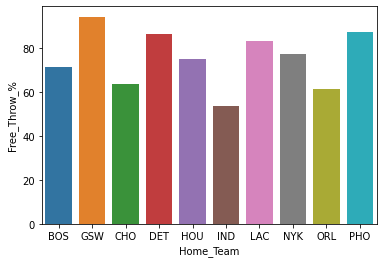

In [1291]:
#HomeFreeThrow
ax = sns.barplot(x=df["Home_Team"].head(10), y=df["Free_Throw_%"]*100)


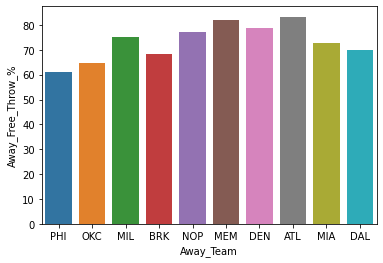

In [1290]:
#AwayFreeThrow
axe = sns.barplot(x=df["Away_Team"].head(10), y=df["Away_Free_Throw_%"]*100)

In [1252]:
#Looking at Free Throw in home court advantage, Free Throw points / Total Points
FTP_TP = round((df['Free_Throw']/df['Points']*100),2)

In [1253]:
#Same but Away
FTP_A = round((df['Away_Free_Throw']/df['Points']*100),2)

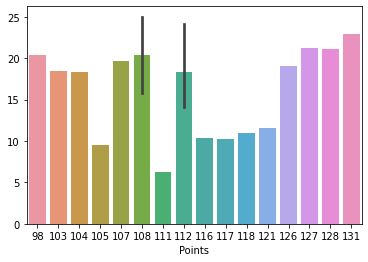

In [1259]:
# Percentage of points that are free throw
axe = sns.barplot(y=FTP_TP, x=df["Points"].head(20))

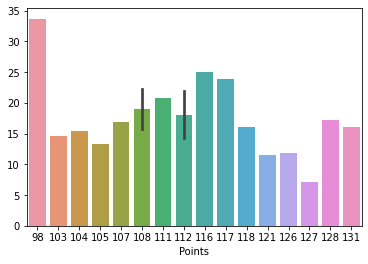

In [1258]:
axe = sns.barplot(y=FTP_A, x=df["Points"].head(20))

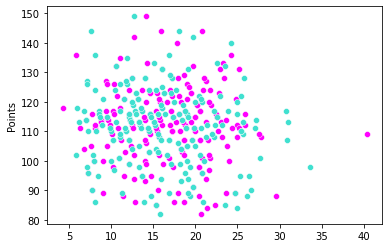

In [1335]:
#Ask Mentor to get Hue working
bar1 = sns.scatterplot(y=df["Points"], x=FTP_TP.head(200),color='magenta')
bar2 = sns.scatterplot(y=df["Points"], x=FTP_A.head(200), color='turquoise')

In [1349]:
#Offensive Efficiency
OE =100*(df['Points'] / df['Field_Goal_Attempts'])
AOE = 100*(df['Away_Points'] / df['Away_Field_Goal_Attempts'])

In [1350]:
df['Away_Offensive_Efficiency'] = AOE
df['Offensive_Efficiency'] = OE

In [1352]:
final_drop_list = ['Field_Goal','Field_Goal_Attempts','2Point','2Point_Attempts','3Point','3Point_Attempts']

In [1351]:
df.head()

,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,3Point,...,Away_2Point_%,Away_3Point,Away_3Point_Attempts,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency
1,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,11,...,0.475,5,26,0.192,14,23,0.609,87,108.247423,100.000000
3,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,7,...,0.426,10,37,0.270,24,37,0.649,100,113.684211,109.890110
5,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,16,...,0.549,14,34,0.412,15,20,0.750,113,121.739130,132.941176
8,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,6,...,0.636,5,27,0.185,15,22,0.682,100,111.956522,121.951220
9,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,16,...,0.575,10,25,0.400,17,22,0.773,131,121.739130,133.673469


In [1379]:
df['ielo'] = 1500
df['Away_ielo'] = 1500

In [1375]:
##ask mentor
def win_margin():
    if df['Points'] > df['Away_Points']:
        return df['Points'] - df['Away_Points']
    else:
        df['Away_Points'] - df['Points']
    return df['Away_Points'] - df['Points']

In [1395]:
def pt_difff():
    if (df['Points'] - df['Away_Points']) > 0:
        return df['Points'] - df['Away_Points']
    else:
        return df['Away_Points'] - df['Points']



In [ ]:
cities = pd.DataFrame([['Sacramento', 'California'], ['Miami', 'Florida']], columns=['City', 'State'])
cities.to_csv('cities.csv', index=False, sep=';')

In [1479]:
df.to_csv('refined_data.csv')
newdf.to_csv('test_data.csv')

,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,3Point,...,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency,ielo,away_ielo,Away_ielo
1,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,11,...,0.192,14,23,0.609,87,108.247423,100.000000,1500,1500,1500
3,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,7,...,0.270,24,37,0.649,100,113.684211,109.890110,1500,1500,1500
5,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,16,...,0.412,15,20,0.750,113,121.739130,132.941176,1500,1500,1500
8,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,6,...,0.185,15,22,0.682,100,111.956522,121.951220,1500,1500,1500
9,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,16,...,0.400,17,22,0.773,131,121.739130,133.673469,1500,1500,1500
